In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [50]:

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory('cell_images')


Found 27558 files belonging to 2 classes.


In [51]:
dataset_itrt =  dataset.as_numpy_iterator()

In [52]:
batch = dataset_itrt.next()

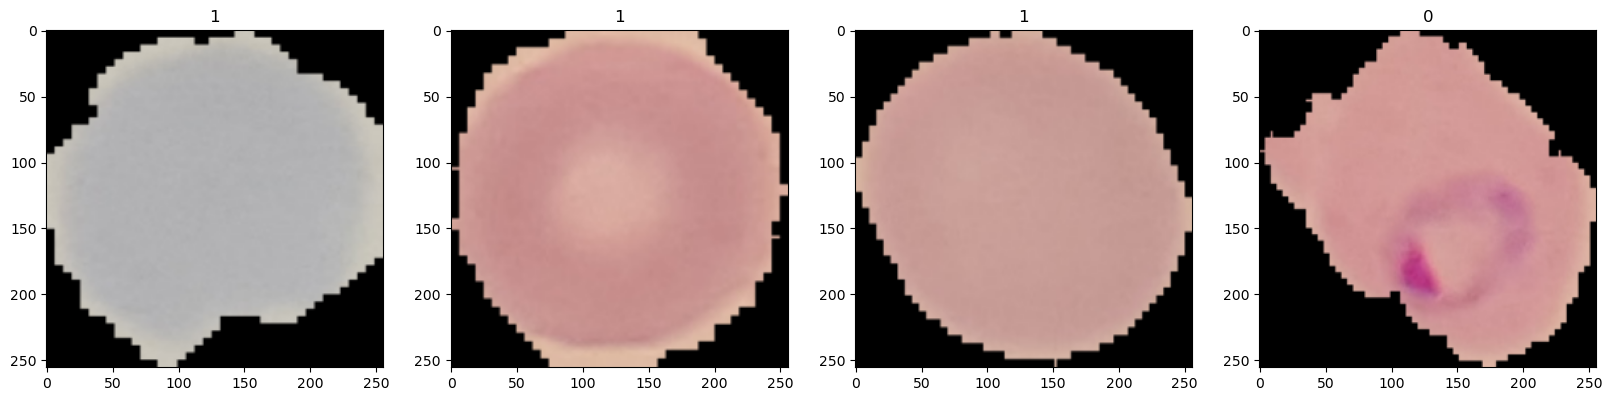

In [53]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [3]:
# Scaling the dataset
scaled_dataset = dataset.map(lambda x, y: (x/255, y))

In [4]:
scaled_itrt = scaled_dataset.as_numpy_iterator()

In [5]:
batch = scaled_itrt.next()

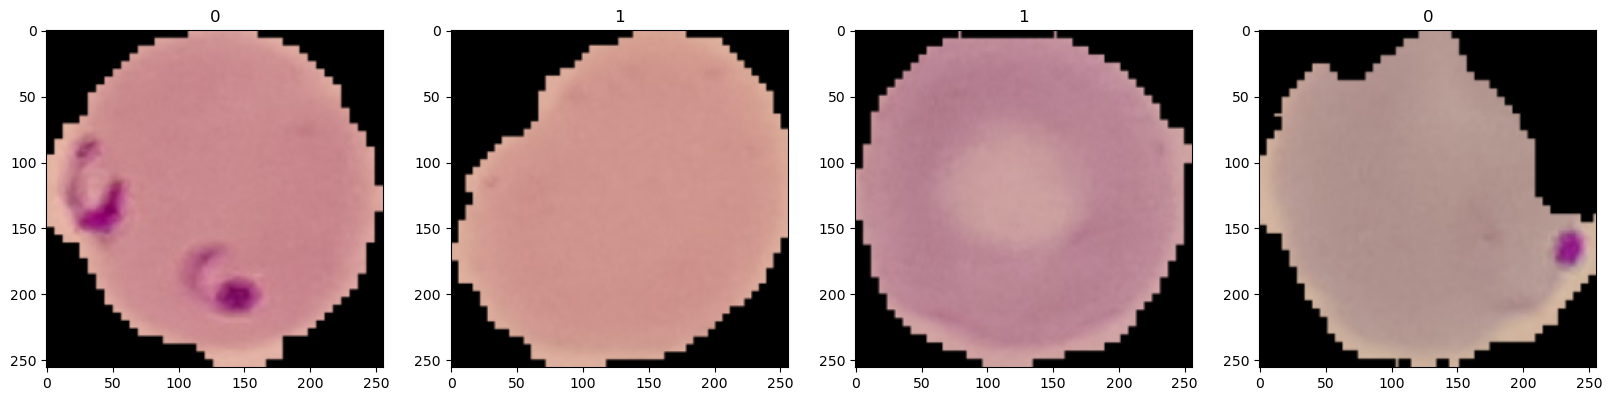

In [6]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [7]:
# Split dataset into train, validation, and test sets
batch_number = len(scaled_dataset)

In [8]:
print(batch_number)

862


In [9]:

# The model learns from the patterns and relationships present in the training data
train_size = int((0.7 * batch_number))

# After each training epoch or iteration, the model's performance is evaluated on the validation set to monitor for overfitting and determine the optimal hyperparameters
val_size = int((0.2 * batch_number))

# completely independent subset of the dataset, not used during training or hyperparameter tuning.
# The test set provides an unbiased estimate of the model's performance on unseen data.
test_size = int((0.1 * batch_number))


In [10]:
print('train_size: ', train_size)
print('val_size: ', val_size)
print('test_size: ', test_size)

train_size:  603
val_size:  172
test_size:  86


In [11]:

train_dataset = scaled_dataset.take(train_size)
val_dataset = scaled_dataset.skip(train_size).take(val_size)
test_dataset = scaled_dataset.skip(train_size + val_size).take(test_size)


In [12]:

# Data augmentation, given the nature of medical imaging
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Build model
model = Sequential([
    data_augmentation,
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])



c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [15]:
# Train model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/10


603/603 ━━━━━━━━━━━━━━━━━━━━ 602s 986ms/step - accuracy: 0.7051 - loss: 0.6910 - val_accuracy: 0.8810 - val_loss: 0.3489
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 479s 795ms/step - accuracy: 0.9199 - loss: 0.3288 - val_accuracy: 0.8294 - val_loss: 0.3759
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 529s 877ms/step - accuracy: 0.9224 - loss: 0.3047 - val_accuracy: 0.9360 - val_loss: 0.2453
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 555s 921ms/step - accuracy: 0.9253 - loss: 0.2973 - val_accuracy: 0.9124 - val_loss: 0.2736
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 499s 827ms/step - accuracy: 0.9242 - loss: 0.2983 - val_accuracy: 0.9435 - val_loss: 0.2412
Epoch 6/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 494s 818ms/step - accuracy: 0.9284 - loss: 0.2959 - val_accuracy: 0.9457 - val_loss: 0.2377
Epoch 7/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 469s 777ms/step - accuracy: 0.9312 - loss: 0.2822 - val_accuracy: 0.9141 - val_loss: 0.2714
Epoch 8/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 463s 767ms/step - accuracy: 0.9257 - loss: 0.27

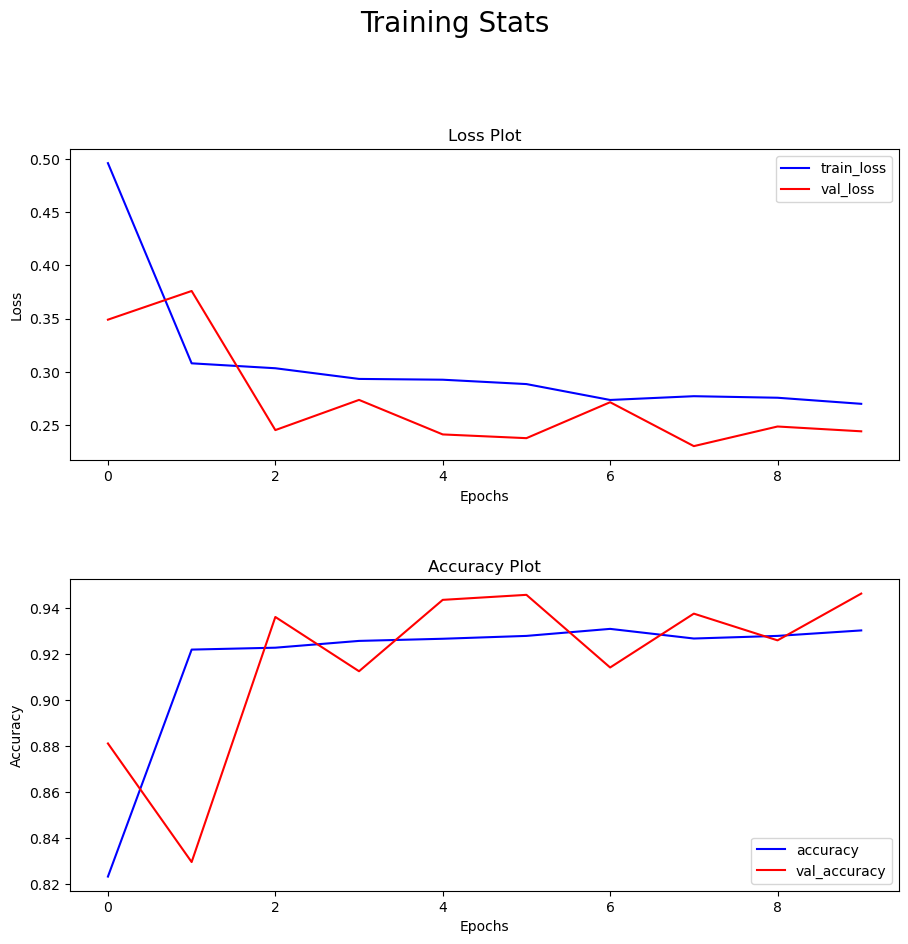

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], color='blue', label="train_loss")
ax[0].plot(history.history['val_loss'], color='red', label="val_loss")
ax[0].set(
    title = "Loss Plot",
    xlabel ="Epochs",
    ylabel = "Loss"
)
ax[0].legend(loc = "upper right")

ax[1].plot(history.history['accuracy'], color='blue', label="accuracy")
ax[1].plot(history.history['val_accuracy'], color='red', label="val_accuracy")
ax[1].set(
    title = "Accuracy Plot",
    xlabel ="Epochs",
    ylabel = "Accuracy"    
)
ax[1].legend(loc = "lower right")
fig.suptitle('Training Stats', fontsize = 20)
fig.tight_layout(pad=4)

plt.show()

In [18]:
# Save the model
model.save('malaria_classification_model.keras')

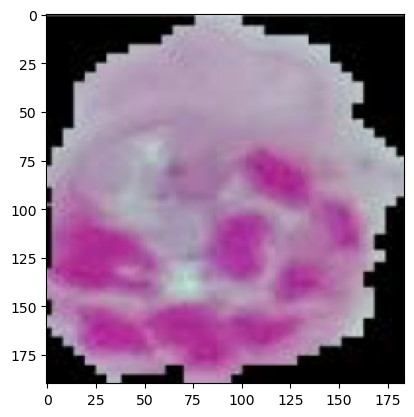

In [56]:
# Testing the Model Prediction Accuracy
img = cv.imread(r'c:\Users\Bildad Otieno\Documents\Billy_Repo\CEMA\test1.PNG')
plt.imshow(img)
plt.show()

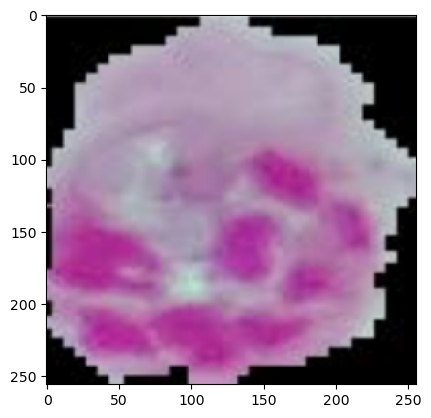

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [59]:
# Display predictions
if yhat[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Parasitized


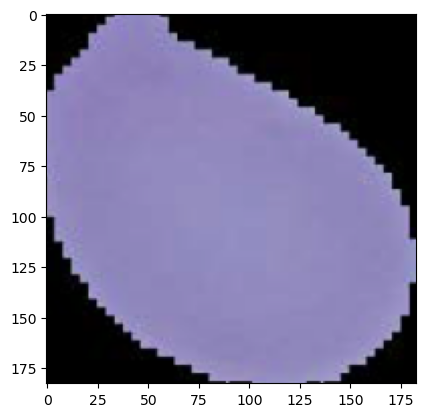

In [61]:
img2 = cv.imread(r'c:\Users\Bildad Otieno\Documents\Billy_Repo\CEMA\test2.PNG')
plt.imshow(img2)
plt.show()

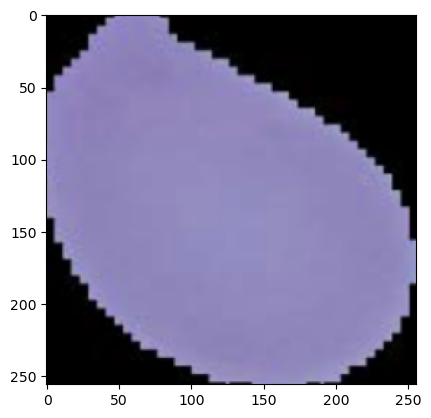

In [62]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [63]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [64]:
# Display predictions
if yhat2[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Uninfected
